<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [8]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [9]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [12]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [13]:
df_data.shape
df_data.index
df_data.columns
df_data.rename(columns = {'Date':'Date_Time'}, inplace = True)



In [14]:
df_data.duplicated()
df_data.isnull()



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [15]:
df_data.drop('Unnamed: 0', axis=1, inplace=True)
df_data.drop('Unnamed: 0.1', axis=1, inplace=True)

df_data = df_data.dropna(how='all')

df_data["Price"] = [float(str(i).replace(",", "")) for i in df_data["Price"]]
price_mean=df_data['Price'].astype(float).mean()
df_data['Price'].fillna(price_mean, inplace=True)

df_data.head()



,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [16]:
df_data.drop_duplicates(keep='first', inplace=True)
df_data.shape
# df_data.info()

(4323, 7)

## Descriptive Statistics

In [17]:
#data processing
df_data['DateTime'] = pd.to_datetime(df_data['Date_Time'])
#getting the launch year
df_data['Year'] = df_data['DateTime'].apply(lambda datetime: datetime.year)
#getting the country of launch
df_data["Country"] = df_data["Location"].apply(lambda location: location.split(", ")[-1])
#getting the launch day of week
df_data['Day']= df_data['Date_Time'].apply(lambda date: date.split()[0])
#getting the month of launch
df_data['Month']= df_data['Date_Time'].apply(lambda date: date.split()[1])
#getting the date of launch ( in a month )
df_data['Date']=df_data['Date_Time'].apply(lambda datum: datum.split()[2][:2]).astype(int)
#getting the hour of launch
df_data['Hour']= df_data['Date_Time'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)

df_data.head()

,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,Thu,Aug,6,4.00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,2020-08-04 23:57:00+00:00,2020,USA,Tue,Aug,4,23.00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,Thu,Jul,30,21.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA,Thu,Jul,30,11.00


In [18]:
list_countries = {'Gran Canaria': 'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China', 
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': "Korea, Democratic People's Republic of",
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of'}
for country in list_countries:
    df_data.Country = df_data.Country.replace(country, list_countries[country])

df_data.head()


,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,Thu,Aug,6,4.00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,2020-08-04 23:57:00+00:00,2020,USA,Tue,Aug,4,23.00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,Thu,Jul,30,21.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA,Thu,Jul,30,11.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

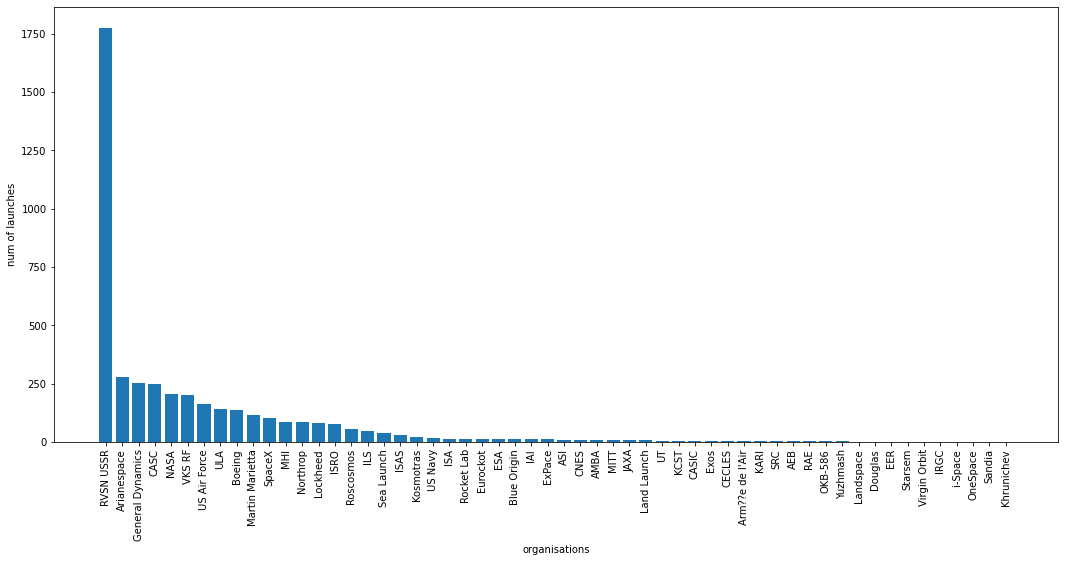

In [20]:
plt.figure(figsize=(18,8))
plt.bar(df_data["Organisation"].value_counts().index, df_data["Organisation"].value_counts())
plt.xticks(df_data["Organisation"].value_counts().index, rotation=90)
plt.xlabel('organisations')
plt.ylabel('num of launches')

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

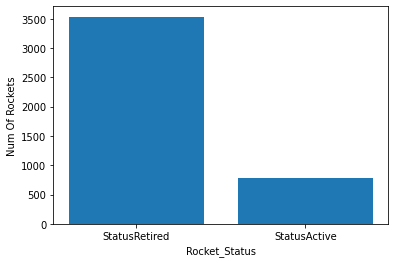

In [22]:
plt.bar(df_data["Rocket_Status"].value_counts().index, df_data["Rocket_Status"].value_counts())
plt.xticks(df_data["Rocket_Status"].value_counts().index)
plt.xlabel('Rocket_Status')
plt.ylabel('Num Of Rockets')

plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

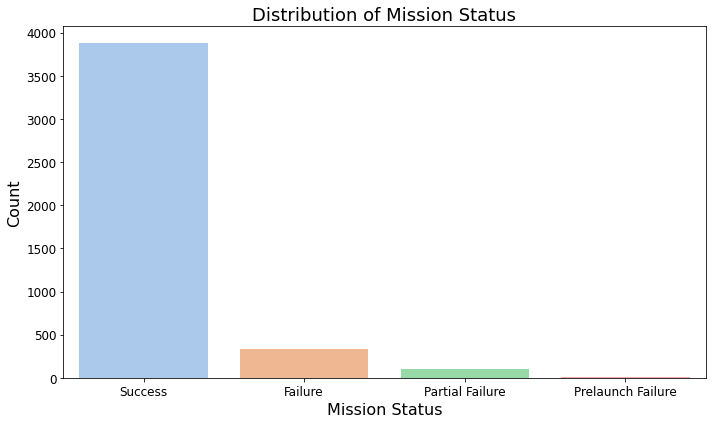

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Mission_Status", data=df_data, order=df_data["Mission_Status"].value_counts().index, palette="pastel")
ax.axes.set_title("Distribution of Mission Status",fontsize=18)
ax.set_xlabel("Mission Status",fontsize=16)
ax.set_ylabel("Count",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

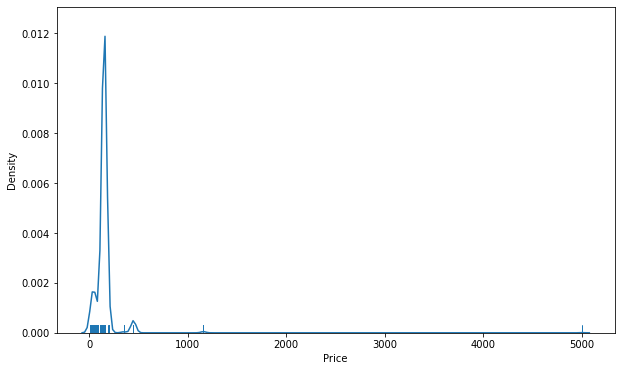

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df_data.Price, hist=False, rug=True)


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [29]:
def iso(country):
    return countries.get(country).alpha3
df_data['ISO'] = df_data.Country.apply(lambda country: iso(country))

In [30]:
iso = df_data.ISO.value_counts()
px.choropleth(df_data, locations=iso.index, color=iso.values, hover_name=iso.index, title='Number of Lauches', color_continuous_scale="Viridis")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': '<b>%{hovertext}</b><br><br>locations=%{location}<br>color=%{z}<extra></extra>',
              'hovertext': array(['RUS', 'USA', 'KAZ', 'FRA', 'CHN', 'JPN', 'IND', 'UMI', 'IRN', 'NZL',
                                  'ISR', 'KEN', 'AUS', 'PRK', 'KOR', 'BRA'], dtype=object),
              'locations': array(['RUS', 'USA', 'KAZ', 'FRA', 'CHN', 'JPN', 'IND', 'UMI', 'IRN', 'NZL',
                                  'ISR', 'KEN', 'AUS', 'PRK', 'KOR', 'BRA'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([1398, 1351,  701,  303,  268,  126,   76,   36,   14,   13,   11,    9,
                             6,    5,    3,    3], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                            '#482878'], [0.2222222222222222,
                                            '#3e4989'], [0.3333333333333333,
                                            '#31688e'], [0.4444444444444444,
                                            '#26828e'], [0.5555555555555556,
                                            '#1f9e89'], [0.6666666666666666,
                                            '#35b779'], [0.7777777777777778,
                                            '#6ece58'], [0.8888888888888888,
                                            '#b5de2b'], [1.0, '#fde725']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Number of Lauches'}}
})

# Use a Choropleth Map to Show the Number of Failures by Country


In [31]:
Failures_data = df_data[df_data['Mission_Status']=='Failure']
failures = Failures_data.groupby(['ISO'])['Mission_Status'].value_counts()
country = [ country[0] for country in failures.index]
px.choropleth(df_data, locations=country, color=failures.values, hover_name=country, title='Number Of Failures', color_continuous_scale="redor")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': '<b>%{hovertext}</b><br><br>locations=%{location}<br>color=%{z}<extra></extra>',
              'hovertext': array(['AUS', 'BRA', 'CHN', 'FRA', 'IND', 'IRN', 'ISR', 'JPN', 'KAZ', 'KOR',
                                  'NZL', 'PRK', 'RUS', 'UMI', 'USA'], dtype=object),
              'locations': array(['AUS', 'BRA', 'CHN', 'FRA', 'IND', 'IRN', 'ISR', 'JPN', 'KAZ', 'KOR',
                                  'NZL', 'PRK', 'RUS', 'UMI', 'USA'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([  3,   2,  19,  13,   8,   8,   2,  10,  72,   2,   2,   3,  63,   3,
                          129], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, 'rgb(246, 210, 169)'],
                                            [0.16666666666666666, 'rgb(245, 183,
                                            142)'], [0.3333333333333333, 'rgb(241,
                                            156, 124)'], [0.5, 'rgb(234, 129,
                                            113)'], [0.6666666666666666, 'rgb(221,
                                            104, 108)'], [0.8333333333333334,
                                            'rgb(202, 82, 104)'], [1.0, 'rgb(177,
                                            63, 100)']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Number Of Failures'}}
})

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [32]:
fig = px.sunburst(df_data, path = ["ISO", "Organisation", "Mission_Status"], values = "Year", title = "Sunburst Chart")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data.head(1)

,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00,USA


In [ ]:
# spaceX = df_data[df_data['Organisation']=='SpaceX']
RVSN_USSR = df_data[df_data['Organisation']=='RVSN USSR']
RVSN_USSR.groupby(['Organisation'])['Price'].sum()
# spaceX.groupby(['Organisation'])['Price'].sum()
total_amount = df_data.groupby(["Organisation"])['Price'].sum()
total_amount



Organisation
AEB                    461.38
AMBA                 1,230.34
ASI                  1,384.13
Arianespace         44,488.97
Arm??e de l'Air        615.17
Blue Origin          1,845.51
Boeing              21,080.19
CASC                20,613.18
CASIC                  768.96
CECLES                 615.17
CNES                 1,230.34
Douglas                153.79
EER                     20.00
ESA                  1,882.51
Eurockot               543.40
ExPace               1,412.43
Exos                   615.17
General Dynamics    38,601.84
IAI                  1,691.71
ILS                  6,395.14
IRGC                   153.79
ISA                  1,999.30
ISAS                 4,613.77
ISRO                 3,561.13
JAXA                   783.17
KARI                   461.38
KCST                   768.96
Khrunichev             153.79
Kosmotras              638.00
Land Launch          1,076.55
Landspace              153.79
Lockheed            11,199.25
MHI                 10,760.

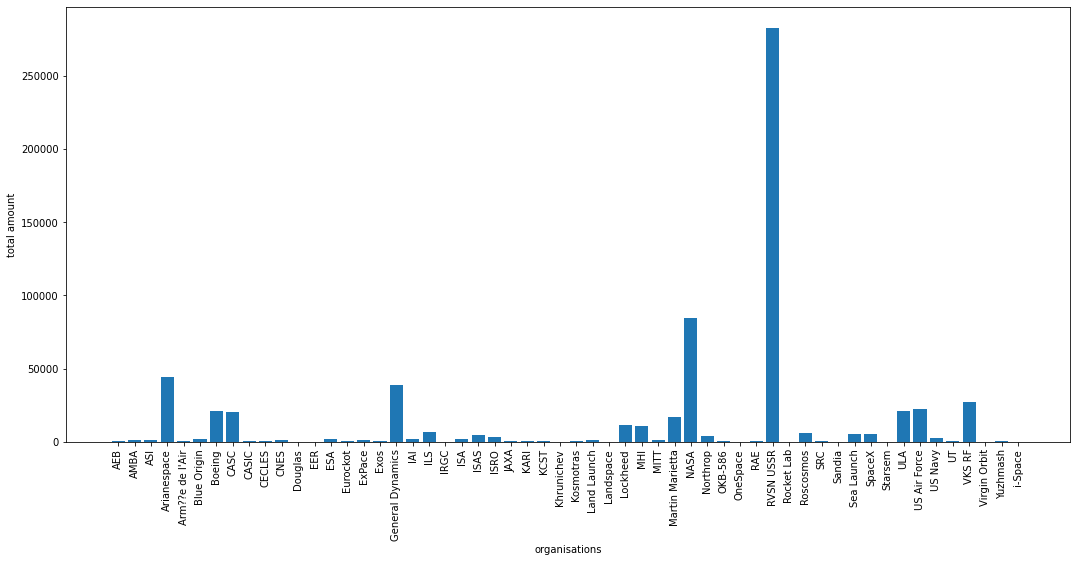

In [ ]:
plt.figure(figsize=(18,8))
plt.bar(total_amount.index, total_amount.values)
plt.xticks(total_amount.index, rotation=90)
plt.xlabel('organisations')
plt.ylabel('total amount')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_data.head(1)

,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00,USA


In [ ]:
amount_per_launch = df_data.groupby(["Organisation"])['Price'].mean()
amount_per_launch

Organisation
AEB                153.79
AMBA               153.79
ASI                153.79
Arianespace        159.46
Arm??e de l'Air    153.79
Blue Origin        153.79
Boeing             155.00
CASC                82.45
CASIC              153.79
CECLES             153.79
CNES               153.79
Douglas            153.79
EER                 20.00
ESA                144.81
Eurockot            41.80
ExPace             141.24
Exos               153.79
General Dynamics   153.79
IAI                153.79
ILS                139.02
IRGC               153.79
ISA                153.79
ISAS               153.79
ISRO                46.86
JAXA               111.88
KARI               153.79
KCST               153.79
Khrunichev         153.79
Kosmotras           29.00
Land Launch        153.79
Landspace          153.79
Lockheed           141.76
MHI                128.10
MITT               153.79
Martin Marietta    147.98
NASA               416.67
Northrop            47.35
OKB-586            153.79

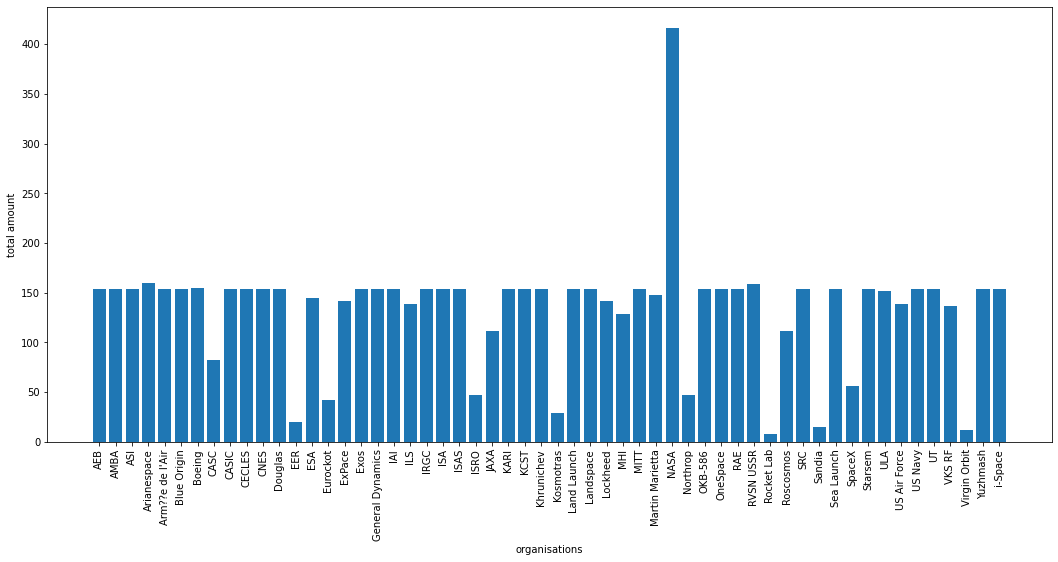

In [ ]:
plt.figure(figsize=(18,8))
plt.bar(amount_per_launch.index, amount_per_launch.values)
plt.xticks(amount_per_launch.index, rotation=90)
plt.xlabel('organisations')
plt.ylabel('total amount')
plt.show()

# Chart the Number of Launches per Year

In [ ]:
df_data.head(1)

,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00,USA


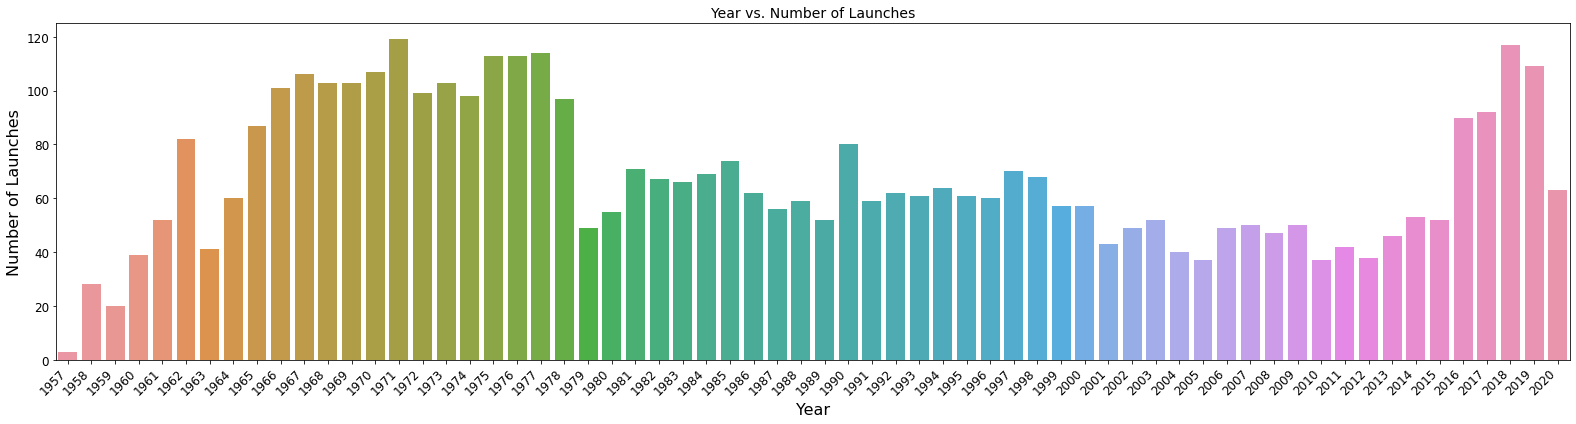

In [ ]:
plt.figure(figsize=(22,6))
ax = sns.countplot(x=df_data['Year'])
ax.axes.set_title("Year vs. Number of Launches",fontsize=14)
ax.set_xlabel("Year", fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

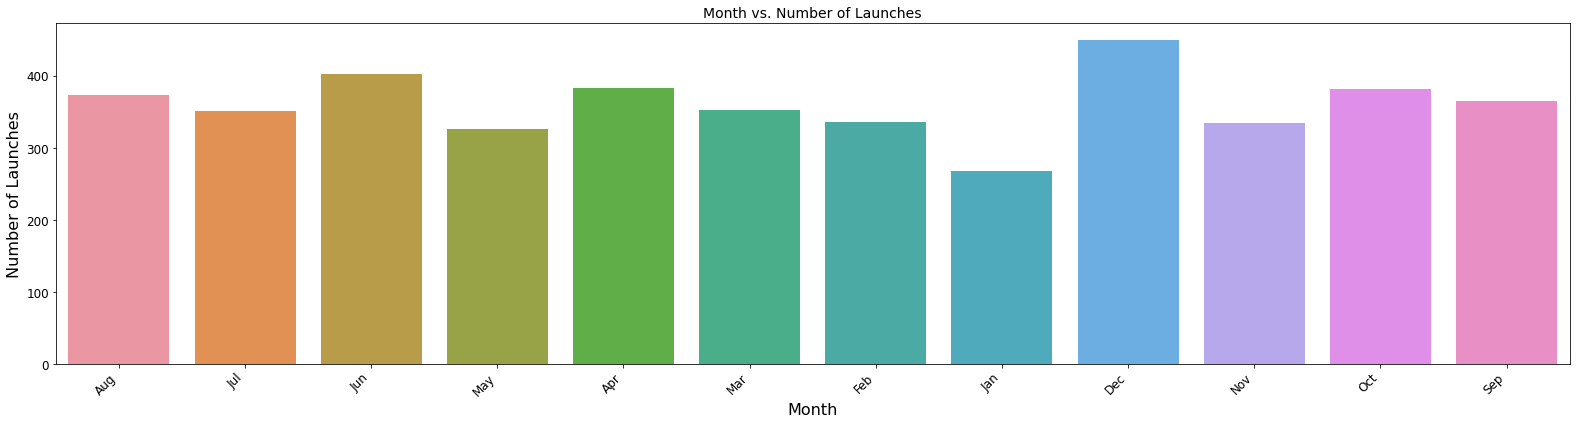

In [ ]:
plt.figure(figsize=(22,6))
ax = sns.countplot(x=df_data['Month'])
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_xlabel("Month", fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
most_popular = df_data['Month'].value_counts()
print(f'December is the most popular for launches')
most_popular.max()

December is the most popular for launches


450

In [ ]:
least_popular = df_data['Month'].value_counts()
print(f'January is the least popular for launches')
least_popular.min()

January is the least popular for launches


268

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
avg_price_per_year = df_data.groupby('Year')['Price'].mean()
avg_price_per_year

Year
1957   153.79
1958   153.79
1959   153.79
1960   153.79
1961   153.79
        ...  
2016   100.93
2017    93.32
2018    86.82
2019    90.72
2020    73.61
Name: Price, Length: 64, dtype: float64

In [ ]:

fig = px.line(avg_price_per_year, x=avg_price_per_year.index, y=avg_price_per_year.values, title='average price of rocket launches')
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
Top_Organisations = df_data['Organisation'].value_counts().head(11)
Number_Of_Launches = Top_Organisations.values
Top_Organisation =Top_Organisations.index

In [ ]:

fig = px.bar(Top_Organisations, x=Top_Organisation, y=Number_Of_Launches, color ='Organisation')
fig.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
USA = df_data[df_data['ISO'] == 'USA'].count()
USA

Organisation      1351
Location          1351
Date_Time         1351
Detail            1351
Rocket_Status     1351
Price             1351
Mission_Status    1351
DateTime          1351
Year              1351
Country           1351
Day               1351
Month             1351
Date              1351
Hour              1327
ISO               1351
dtype: int64

In [ ]:

RUS = df_data[df_data['ISO'] == 'RUS'].count()

RUS.Mission_Status


# df_data['ISO'].unique()


1398

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
USSR_VS_USA_DF = df_data[(df_data['ISO']== 'USA') | (df_data['ISO']== 'RUS') | (df_data['ISO']== 'KAZ')]
grouped = USSR_VS_USA_DF.groupby(['ISO'])['Mission_Status'].count()
grouped.values

array([ 701, 1398, 1351])

In [ ]:
fig = px.pie(grouped, values=grouped.values, names=grouped.index)
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
USSR_VS_USA_DF = df_data[(df_data['ISO']== 'USA') | (df_data['ISO']== 'RUS')]
USSR_VS_USA_DF.head(5)


,Organisation,Location,Date_Time,Detail,Rocket_Status,Price,Mission_Status,DateTime,Year,Country,Day,Month,Date,Hour,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,USA,Fri,Aug,7,5.00,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,2020-08-04 23:57:00+00:00,2020,USA,Tue,Aug,4,23.00,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,USA,Thu,Jul,30,11.00,USA
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,2020-07-20 21:30:00+00:00,2020,USA,Mon,Jul,20,21.00,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.00,Success,2020-07-15 13:46:00+00:00,2020,USA,Wed,Jul,15,13.00,USA


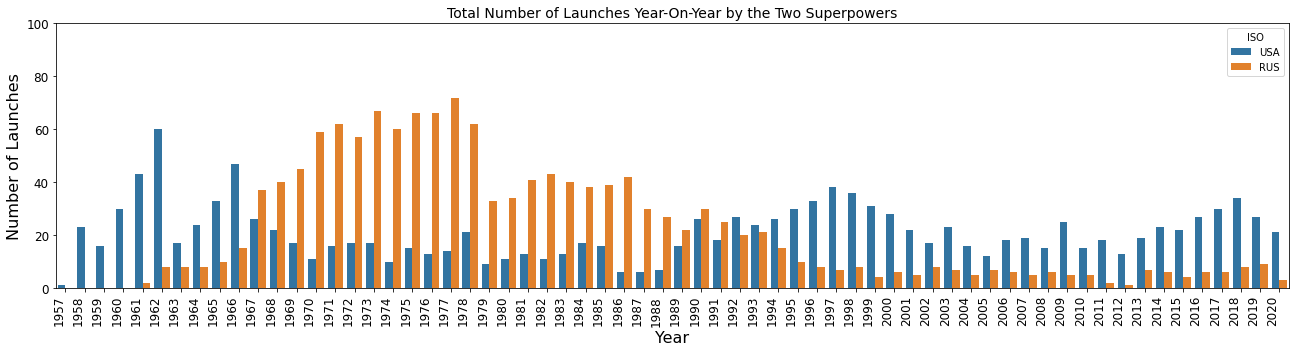

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Year',hue="ISO",data= USSR_VS_USA_DF)
ax.axes.set_title("Total Number of Launches Year-On-Year by the Two Superpowers",fontsize=14)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.ylim(0,100)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
Failure_DF = USSR_VS_USA_DF[(df_data['Mission_Status'] == 'Failure') | (df_data['Mission_Status'] == 'Partial Failure')|(df_data['Mission_Status'] == 'Prelaunch Failure')]


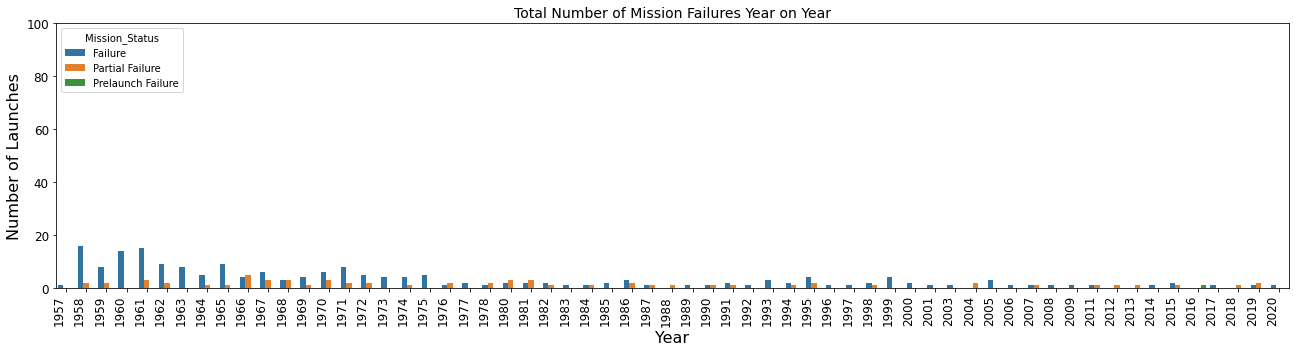

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Year',hue="Mission_Status",data= Failure_DF)
ax.axes.set_title("Total Number of Mission Failures Year on Year",fontsize=14)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Number of Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.ylim(0,100)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:

Failure_Percentage_DF= pd.DataFrame(Failure_DF.groupby(['Year'])['Mission_Status'].value_counts())
Failure_Percentage_DF = Failure_Percentage_DF.reset_index(level=[0,0])
Failure_Percentage_DF
x = pd.DataFrame(Failure_Percentage_DF.groupby(['Year'])['Mission_Status'].sum())
x = x.reset_index(level=[0,0])


,Year,Mission_Status
0,1957,1
1,1958,18
2,1959,10
3,1960,14
4,1961,18
...,...,...
56,2016,1
57,2017,1
58,2018,1
59,2019,3


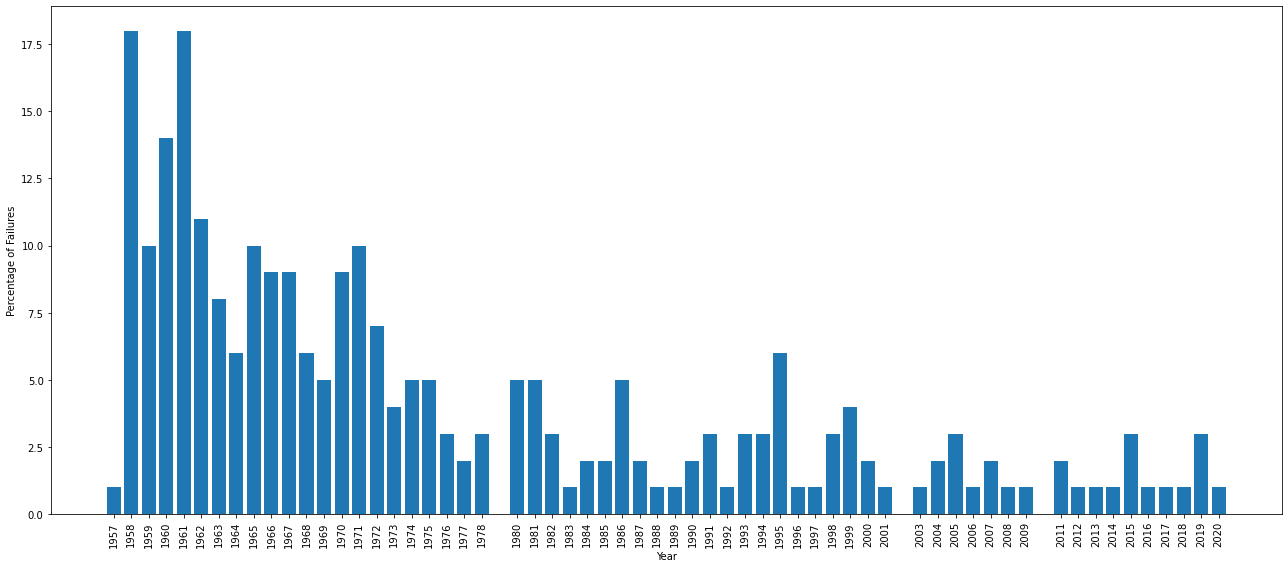

In [ ]:
plt.figure(figsize=(18,8))
plt.bar(x['Year'], x['Mission_Status'])
plt.xticks(x['Year'], rotation=90)
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')

plt.show()

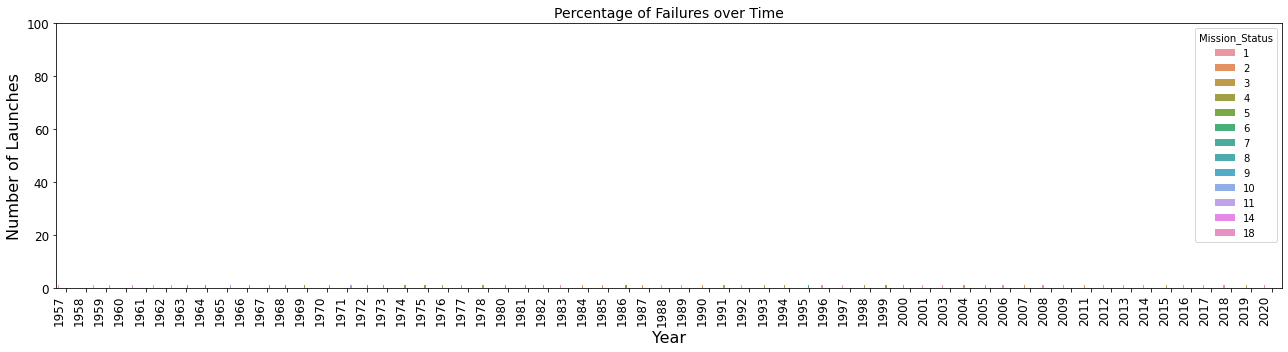

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
country_df = pd.DataFrame(df_data.groupby(["Country", "Year"])["Location"].count())
country_df = country_df.reset_index(level=[0,1])

In [ ]:

fig = px.bar(country_df, x='Year', y='Location', color ='Country')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
organisation_df = pd.DataFrame(df_data.groupby(["Organisation", "Year"])["Location"].count())
organisation_df = organisation_df.reset_index(level=[0,1])

In [ ]:
fig = px.bar(organisation_df, x='Year', y='Location', color ='Organisation')
fig.show()